# Homework 5
    Name: Stanly Gomes
    Student ID: 801118166

In [233]:
# Library import code from book
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Personal imports
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

## Problem 1

In [234]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = 0.1*t_u

In [235]:
# Linear Model
def lin_model(t_u, w, b):
    return w * t_u + b

In [236]:
# Non-Linear Model
def model(t_u, w1, w2, b):
    return w1 * t_u ** 2 + w2 * t_u + b

In [237]:
# Calculate loss and provides average
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [238]:
# Linear model parameters
w = torch.ones(())
lin_b = torch.zeros(())
lin_t_p = lin_model(t_u, w, lin_b)
lin_t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [239]:
# Non-linear model parameters
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w1, w2, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [227]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [228]:
# Non-linear training loop
def training_loop (n_epochs, optimizer, params, t_u, t_c, learning_rate):
    print(f'Learning Rate: {learning_rate}')
    for epoch in range(1, n_epochs+1):
        w1, w2, b = params
        t_p = model (t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print ('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params, loss

# Linear training loop
def lin_training_loop (n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs+1):
        t_p = lin_model (t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print ('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params, loss

In [229]:
learning_rate = [0.1, 0.01, 0.001, 0.0001]
train_params = torch.zeros(len(learning_rate), 3)
train_loss = torch.zeros(len(learning_rate), 1)
lin_train_params = torch.zeros(1, 2)
lin_train_loss = torch.zeros(1, 1)

for i in learning_rate:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=i)

    train_params[learning_rate.index(i)], train_loss[learning_rate.index(i)] = training_loop(
        n_epochs = 5000,
        optimizer = optimizer,
        params = params,
        t_u = t_un,
        t_c = t_c,
        learning_rate = i)

# Compare with linear model
lin_params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([lin_params], lr=learning_rate)
print(f'Linear model with LR={learning_rate}')
lin_train_params, lin_train_loss = lin_training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = lin_params,
    t_u = t_un,
    t_c = t_c)

Learning Rate: 0.1
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Learning Rate: 0.01
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Learning Rate: 0.001
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Learning Rate: 0.0001
Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123477
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845285
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744
Linear model with LR=0.0001
Epo

In [230]:
train_params

tensor([[    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [ 0.5570, -0.8881, -0.8753]], grad_fn=<CopySlices>)

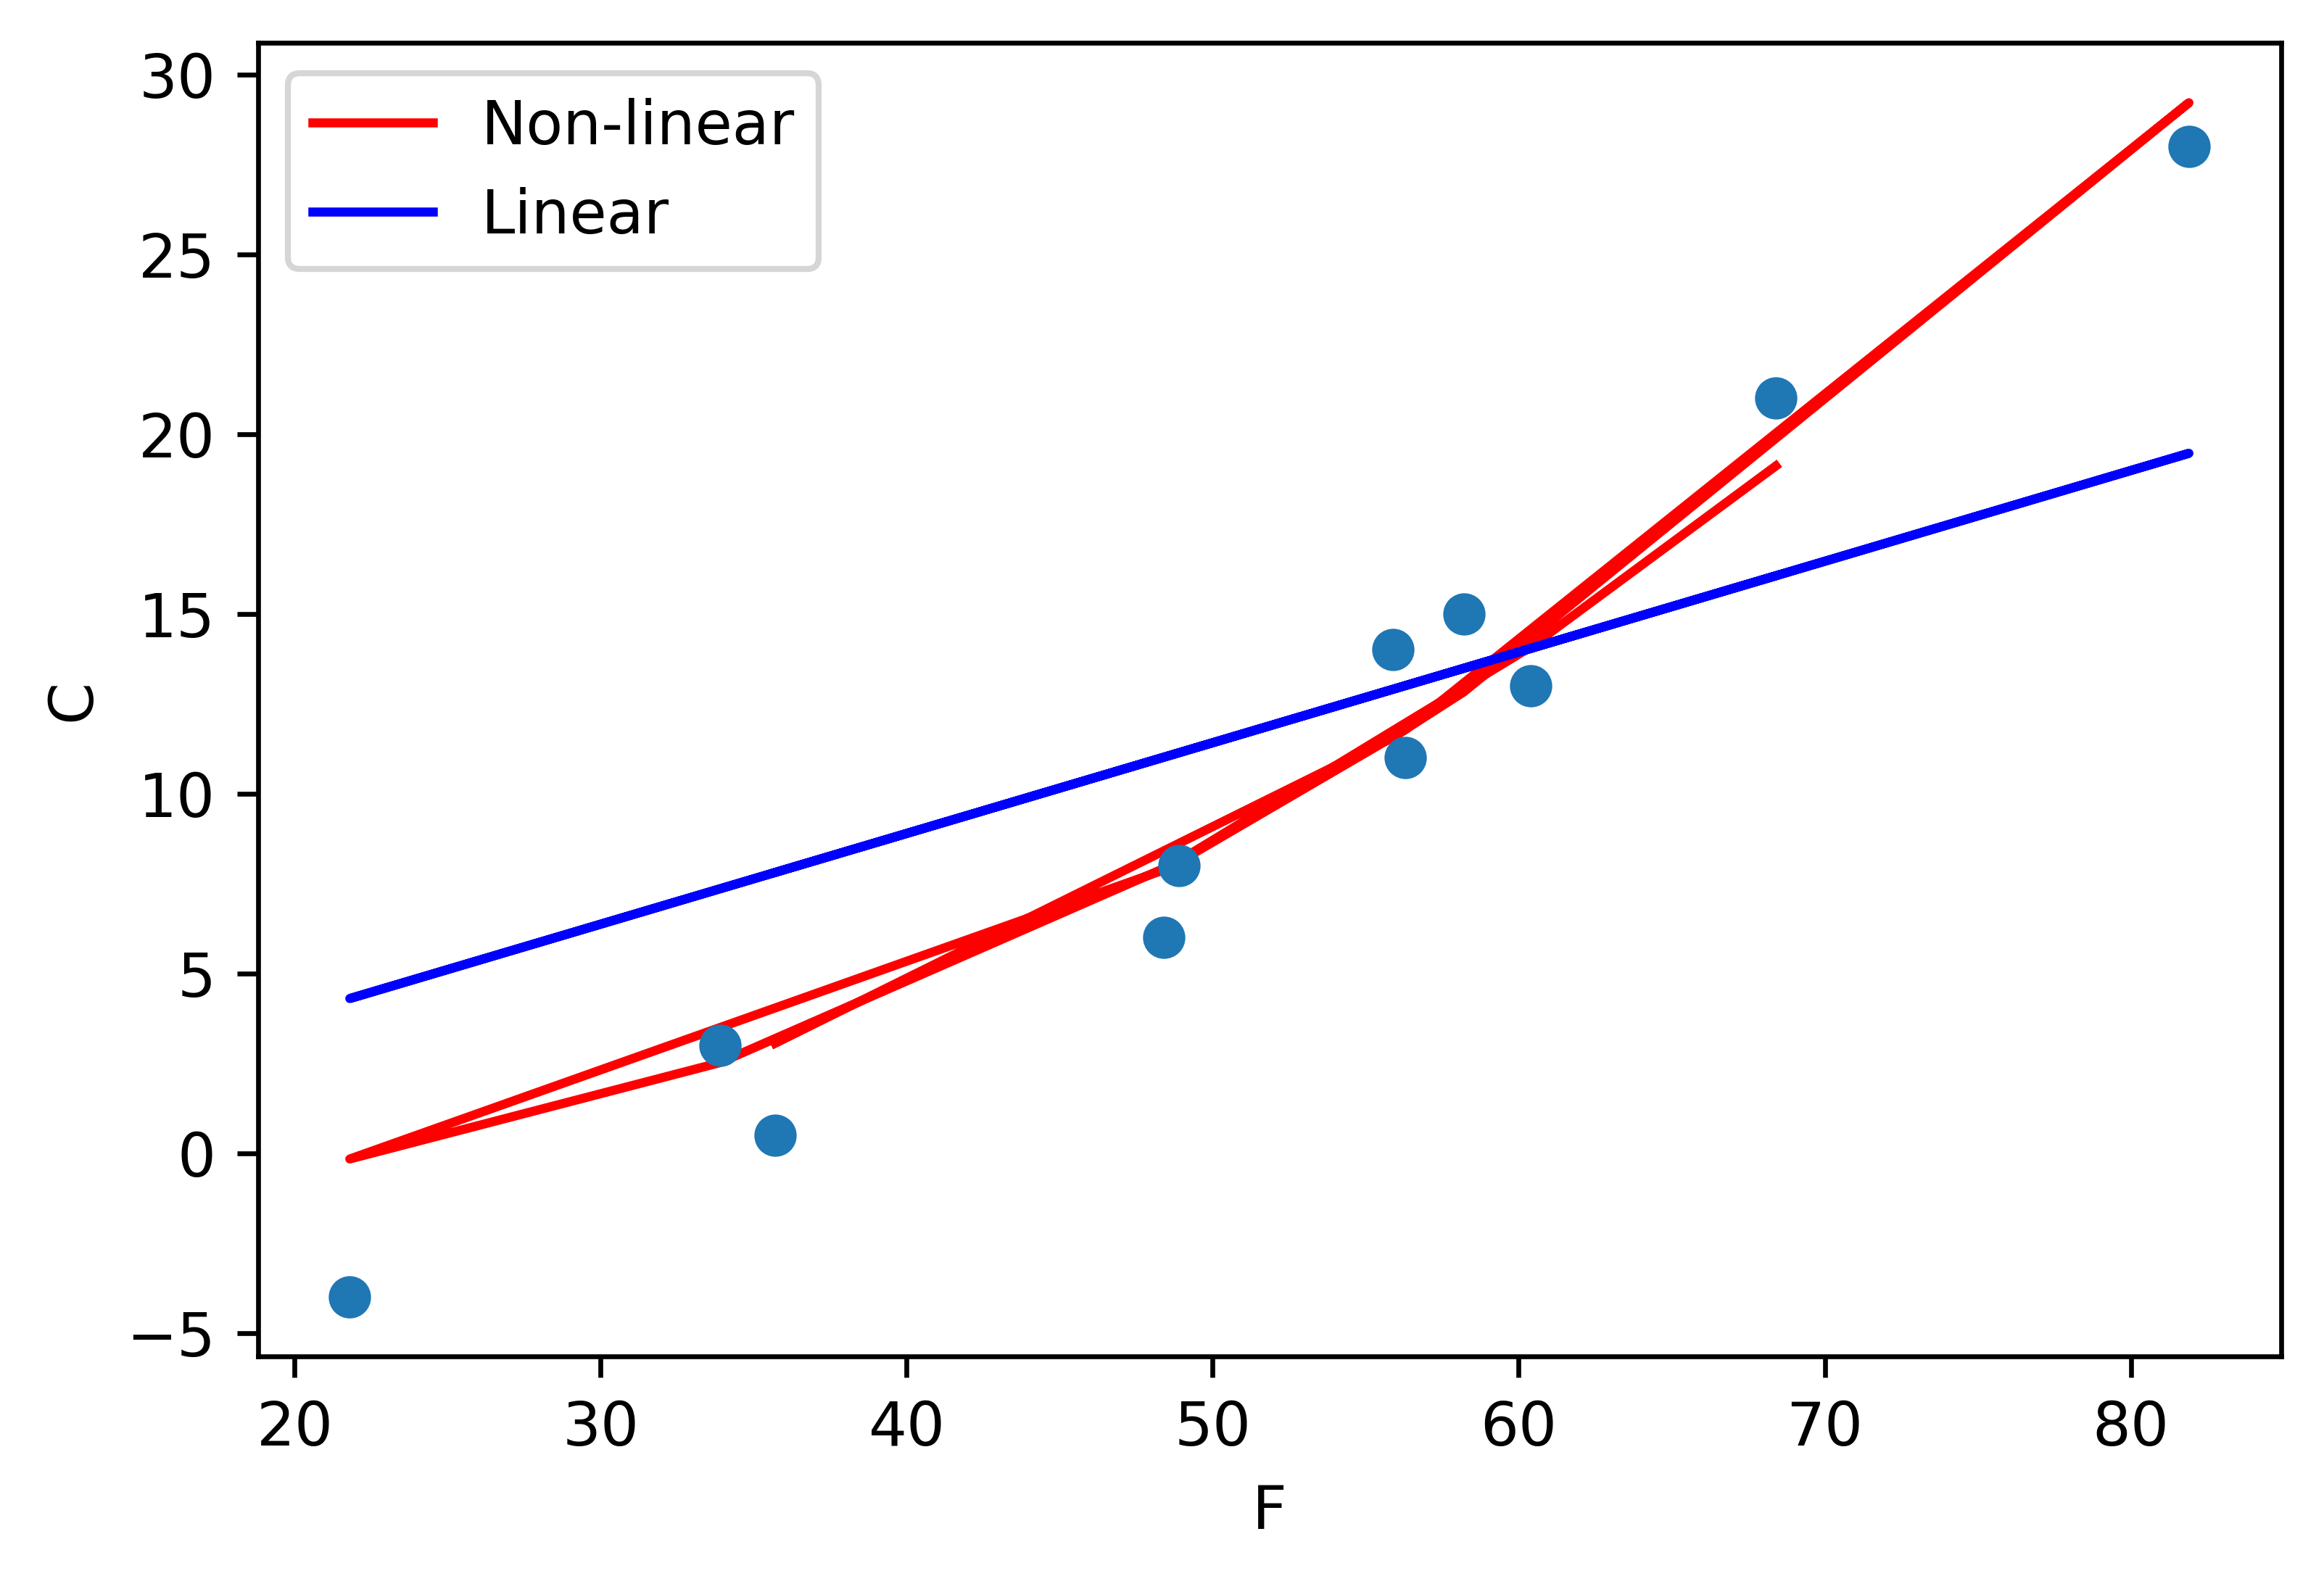

In [232]:
# Due to valid losses only occuring with LR of 0.0001 (or greater),
# the last trained parameter set will be the best set
best_params = train_params[3]
t_p = model(t_un, *best_params)
lin_t_p = lin_model(t_un, *lin_train_params)

# Testing
# t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

fig = plt.figure(dpi=600)
plt.xlabel('F')
plt.ylabel('C')
plt.plot(t_u.numpy(), t_p.detach().numpy(), 'r', label='Non-linear')
plt.plot(t_u.numpy(), lin_t_p.detach().numpy(), 'b', label='Linear')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.legend()

## Problem 2

In [15]:
varlist = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
housing = pd.DataFrame(pd.read_csv("./Housing.csv"), columns = varlist)
housing.shape

(545, 6)

In [16]:
# Removing strings in dataset
housing.replace('yes', 1, inplace=True)
housing.replace('no', 0, inplace=True)
housing.replace('furnished', 2, inplace=True)
housing.replace('semi-furnished', 1, inplace=True)
housing.replace('unfurnished', 0, inplace=True)

housing = StandardScaler().fit_transform(housing)
# x = housing[varlist]
# y = housing['price']
y = housing[:,-1]
housing = np.delete(housing, housing.shape[1]-1, -1)
x = housing
x.shape

(545, 5)

In [17]:
# norm_x = StandardScaler().fit_transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(436, 5) (109, 5) (436,) (109,)


In [18]:
# Convert to tensors
Y_train = torch.tensor(Y_train.ravel())
X_train = torch.tensor(X_train)
X_train = torch.transpose(X_train, 0, 1)
X_train = torch.split(X_train, 1)

Y_test = torch.tensor(Y_test.ravel())
X_test = torch.tensor(X_test)
X_test = torch.transpose(X_test, 0, 1)
X_test = torch.split(X_test, 1)

In [19]:
def lin_model_6(x5, x4, x3, x2, x1, w5, w4, w3, w2, w1, b):
    return w5 * x5 + w4* x4 + w3 * x3 + w2 * x2 + w1 * x1 + b

def loss_fn_6(t_p, y):
    squared_diff = (t_p - y)**2
    return squared_diff.mean()

def training_loop_6(n_epochs, optimizer, params, train_x, train_y, test_x, test_y, learning_rate):
    print(f'Learning Rate: {learning_rate}')
    for epoch in range(1, n_epochs+1):
        t_p = lin_model_6 (*train_x, *params)
        t_p = torch.reshape(t_p, (-1,))
        loss = loss_fn_6(t_p, train_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            val_t_p = lin_model_6(*test_x, *params)
            val_t_p = torch.reshape(val_t_p, (-1,))
            val_loss = loss_fn_6(val_t_p, test_y)
            print (f'Epoch {epoch}: Training Loss = {loss}, Validation Loss = {val_loss}')
    return params, loss

In [20]:
learning_rate = [0.1, 0.01, 0.001, 0.0001]
train_params = torch.zeros(len(learning_rate), len(varlist))
train_loss = torch.zeros(len(learning_rate), 1)
lin_train_params = torch.zeros(1, 2)
lin_train_loss = torch.zeros(1, 1)

for i in learning_rate:
    params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=i)

    train_params[learning_rate.index(i)], train_loss[learning_rate.index(i)] = training_loop_6(
        n_epochs = 5000,
        optimizer = optimizer,
        params = params,
        train_x = X_train,
        train_y = Y_train,
        test_x = X_test,
        test_y = Y_test,
        learning_rate = i)

Learning Rate: 0.1
Epoch 500: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Epoch 1000: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Epoch 1500: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Epoch 2000: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Epoch 2500: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Epoch 3000: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Epoch 3500: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Epoch 4000: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Epoch 4500: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Epoch 5000: Training Loss = 0.4656211385036159, Validation Loss = 0.33612493606266414
Learning Rate: 0.01
Epoch 500: Training Loss = 0.4656211911638495, Validation Loss = 0.33608939914455876
Epoch 1000: Train

In [21]:
train_params

tensor([[ 0.4027,  0.0904,  0.3196,  0.2440,  0.1612,  0.0037],
        [ 0.4027,  0.0904,  0.3196,  0.2440,  0.1612,  0.0037],
        [ 0.4025,  0.0905,  0.3194,  0.2440,  0.1613,  0.0036],
        [ 0.4699,  0.2353,  0.3802,  0.3575,  0.3443, -0.0025]],
       grad_fn=<CopySlices>)

## Problem 3

### Part A

In [182]:
# Using data from Problem 2
# variables x and y contain normalized housing data
housing_df = pd.DataFrame(housing)
housing_df

,0,1,2,3,4
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692
3,1.083624,1.403419,1.421812,0.224410,2.679409
4,1.046726,1.403419,-0.570187,0.224410,1.517692
...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741


In [183]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(436, 5) (109, 5) (436,) (109,)


In [184]:
# Convert to tensors
Y_train = torch.tensor(Y_train.ravel())
X_train = torch.tensor(X_train)
# X_train = torch.transpose(X_train, 0, 1)
# X_train = torch.split(X_train, 1)

Y_test = torch.tensor(Y_test.ravel())
X_test = torch.tensor(X_test)
# X_test = torch.transpose(X_test, 0, 1)
# X_test = torch.split(X_test, 1)

In [216]:
def loss_fn_nn(t_p, y):
    squared_diff = (t_p - y)**2
    return squared_diff.mean()

# NN Training Loop
def training_loop_nn(n_epochs, optimizer, model, train_x, train_y, test_x, test_y):
    for epoch in range(1, n_epochs+1):
        t_p = model(train_x.float())
        t_p = torch.reshape(t_p, (-1,))
        loss = loss_fn_nn(t_p, train_y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 50 == 0:
            val_t_p = model(test_x.float())
            val_t_p = torch.reshape(val_t_p, (-1,))
            val_loss = loss_fn_nn(val_t_p, test_y)
            print (f'Epoch {epoch}: Training Loss = {loss}, Validation Loss = {val_loss}')
    return params, loss

In [217]:
# Neural Network with 1 hidden layer
# 5 input features will output 8 with bias
# Output takes 8 inputs and output 1 with bias
model_one = nn.Sequential(nn.Linear(5, 8), nn.ReLU(), nn.Linear(8, 1))
model_one

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [218]:
optimizer = optim.SGD(model_one.parameters(), lr=0.07)
train_params_one = []
train_loss_one = []

train_params_one, train_loss_one = training_loop_nn(
    n_epochs = 200, optimizer = optimizer,
    model = model_one, train_x = X_train,
    train_y = Y_train, test_x = X_test,
    test_y = Y_test)

Epoch 50: Training Loss = 0.47148941289167073, Validation Loss = 0.33611141205837697
Epoch 100: Training Loss = 0.450174478223789, Validation Loss = 0.3290381312005883
Epoch 150: Training Loss = 0.44366449117398926, Validation Loss = 0.33176357222739494
Epoch 200: Training Loss = 0.43715101325502864, Validation Loss = 0.3327354334632003


In [188]:
train_params_one

tensor([ 0.4699,  0.2353,  0.3802,  0.3575,  0.3443, -0.0025],
       requires_grad=True)

In [189]:
train_loss_one

tensor(0.4331, dtype=torch.float64, grad_fn=<MeanBackward0>)

### Part B

In [213]:
# Neural Network with 3 hidden layers
# 5 input features will output 8 with bias
# Output takes 8 inputs and output 1 with bias
model_three = nn.Sequential(nn.Linear(5, 8), nn.ReLU(),
                            nn.Linear(8, 8), nn.ReLU(),
                            nn.Linear(8, 8), nn.ReLU(),
                            nn.Linear(8, 1))
model_three

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=8, bias=True)
  (5): ReLU()
  (6): Linear(in_features=8, out_features=1, bias=True)
)

In [214]:
optimizer = optim.SGD(model_three.parameters(), lr=0.09)
train_params_three = []
train_loss_three = []

train_params_three, train_loss_three = training_loop_nn(
    n_epochs = 200, optimizer = optimizer,
    model = model_three, train_x = X_train,
    train_y = Y_train, test_x = X_test,
    test_y = Y_test)

Epoch 50: Training Loss = 0.46459866631956587, Validation Loss = 0.338609394025321
Epoch 100: Training Loss = 0.44075205098537407, Validation Loss = 0.3332733334843175
Epoch 150: Training Loss = 0.42625675727643253, Validation Loss = 0.3354831613873975
Epoch 200: Training Loss = 0.41510950814978975, Validation Loss = 0.3367185847365864
